## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

In [1]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.6.0
TensorFlow 2.0 Hello World


In [2]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [3]:
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data(test_split=0.2)

print(X_train.shape, X_test.shape)

65536/57026 [==================================] - 0s 0us/step
(404, 13) (102, 13)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [7]:
bigger_model = Sequential()
bigger_model.add(Dense(32, activation='relu', input_shape=(13,)))
bigger_model.add(Flatten())
bigger_model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.5)))
bigger_model.add(Dense(1, activation='relu'))

bigger_model.compile(optimizer='adam',
                     loss='mse',
                    metrics=['mse'])

bigger_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [8]:
bigger_history = bigger_model.fit(X_train, y_train, batch_size=1000, epochs=400, verbose=False)

In [9]:
ypred = bigger_model.predict(X_test)

In [10]:
print(bigger_model.evaluate(X_train, y_train))

13/13 [==============================] - 0s 3ms/step - loss: 14.8380 - mse: 14.8380
[14.838016510009766, 14.838016510009766]


In [11]:
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 29.8256


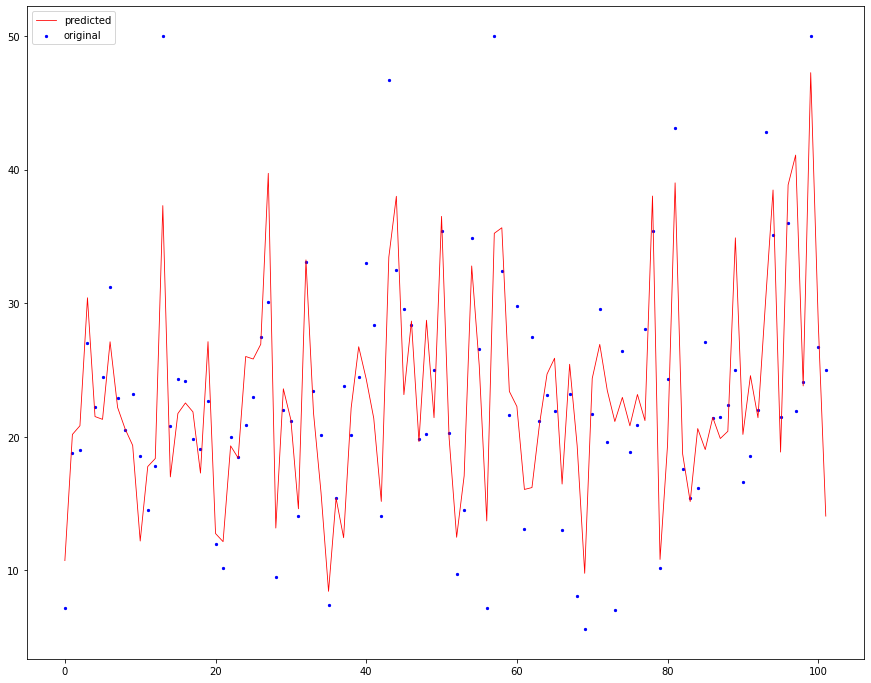

In [14]:
x_ax = range(len(ypred))
plt.figure(figsize=(15, 12))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

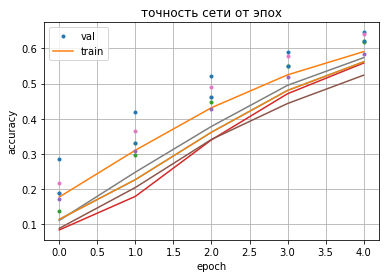

In [ ]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0] 

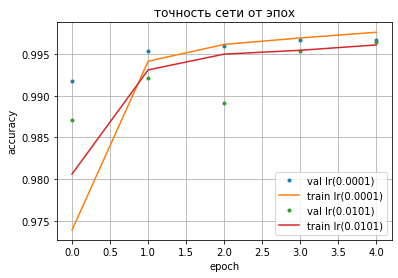

In [ ]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001+0.01*i, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.',label='val lr(' +str(0.0001+0.01*i)+')')
  plt.plot(bigger_history4.history['accuracy'] ,label='train lr(' +str(0.0001+0.01*i)+')')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [ ]:
bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )